# KNN 이진분류
- 아이리스 데이터를 이용해서 2진분류

1. 데이터 준비

In [ ]:
# !wget https://raw.githubusercontent.com/devdio/flyai_datasets/main/iris.csv

time: 407 µs (started: 2024-06-28 07:32:09 +00:00)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
import keras

time: 934 µs (started: 2024-06-28 07:32:09 +00:00)


In [ ]:
!pip install --q ipython-autotime
%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 7.64 s (started: 2024-06-28 07:32:09 +00:00)


In [ ]:
iris = pd.read_csv('iris.csv')
iris

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


time: 32 ms (started: 2024-06-28 07:32:17 +00:00)


In [ ]:
iris.shape

(150, 5)

time: 4.06 ms (started: 2024-06-28 07:32:17 +00:00)


In [ ]:
iris.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


time: 22.1 ms (started: 2024-06-28 07:32:17 +00:00)


In [ ]:
df = iris.copy()

time: 934 µs (started: 2024-06-28 07:32:17 +00:00)


In [ ]:
df.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


time: 23.6 ms (started: 2024-06-28 07:32:17 +00:00)


In [ ]:
idx_train = int(len(df) * 0.8)
idx_var = int(len(df) * 0.2)
idx_train, idx_var

(120, 30)

time: 5.86 ms (started: 2024-06-28 07:32:17 +00:00)


In [ ]:
df = df.sample(frac=1)
df

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
119,6.0,2.2,5.0,1.5,virginica
64,5.6,2.9,3.6,1.3,versicolor
72,6.3,2.5,4.9,1.5,versicolor
143,6.8,3.2,5.9,2.3,virginica
8,4.4,2.9,1.4,0.2,setosa
...,...,...,...,...,...
94,5.6,2.7,4.2,1.3,versicolor
37,4.9,3.6,1.4,0.1,setosa
80,5.5,2.4,3.8,1.1,versicolor
30,4.8,3.1,1.6,0.2,setosa


time: 26.6 ms (started: 2024-06-28 07:32:17 +00:00)


In [ ]:
train = df.iloc[:idx_train,:]
var = df.iloc[idx_train:,:]
train, var

(     Sepal Length  Sepal Width  Petal Length  Petal Width     Species
 119           6.0          2.2           5.0          1.5   virginica
 64            5.6          2.9           3.6          1.3  versicolor
 72            6.3          2.5           4.9          1.5  versicolor
 143           6.8          3.2           5.9          2.3   virginica
 8             4.4          2.9           1.4          0.2      setosa
 ..            ...          ...           ...          ...         ...
 95            5.7          3.0           4.2          1.2  versicolor
 102           7.1          3.0           5.9          2.1   virginica
 109           7.2          3.6           6.1          2.5   virginica
 98            5.1          2.5           3.0          1.1  versicolor
 44            5.1          3.8           1.9          0.4      setosa
 
 [120 rows x 5 columns],
      Sepal Length  Sepal Width  Petal Length  Petal Width     Species
 137           6.4          3.1           5.5     

time: 17.2 ms (started: 2024-06-28 07:32:17 +00:00)


In [ ]:
X_train = train.drop('Species', axis=1)
y_train = train['Species']
X_var = var.drop('Species', axis=1)
y_var = var['Species']
X_train, y_train, X_var, y_var

(     Sepal Length  Sepal Width  Petal Length  Petal Width
 119           6.0          2.2           5.0          1.5
 64            5.6          2.9           3.6          1.3
 72            6.3          2.5           4.9          1.5
 143           6.8          3.2           5.9          2.3
 8             4.4          2.9           1.4          0.2
 ..            ...          ...           ...          ...
 95            5.7          3.0           4.2          1.2
 102           7.1          3.0           5.9          2.1
 109           7.2          3.6           6.1          2.5
 98            5.1          2.5           3.0          1.1
 44            5.1          3.8           1.9          0.4
 
 [120 rows x 4 columns],
 119     virginica
 64     versicolor
 72     versicolor
 143     virginica
 8          setosa
           ...    
 95     versicolor
 102     virginica
 109     virginica
 98     versicolor
 44         setosa
 Name: Species, Length: 120, dtype: object,
      Sepal 

time: 16.4 ms (started: 2024-06-28 07:32:17 +00:00)


In [ ]:
u = X_train.mean(); u

Sepal Length    5.905000
Sepal Width     3.039167
Petal Length    3.886667
Petal Width     1.265000
dtype: float64

time: 5.45 ms (started: 2024-06-28 07:32:17 +00:00)


In [ ]:
s = X_train.std(); s

Sepal Length    0.823994
Sepal Width     0.432172
Petal Length    1.771717
Petal Width     0.771842
dtype: float64

time: 15.3 ms (started: 2024-06-28 07:32:17 +00:00)


In [ ]:
X_train = (X_train - u) / s
X_var = (X_var - u) / s
X_train, X_var

(     Sepal Length  Sepal Width  Petal Length  Petal Width
 119      0.115292    -1.941744      0.628392     0.304467
 64      -0.370148    -0.322017     -0.161802     0.045346
 72       0.479372    -1.247575      0.571950     0.304467
 143      1.086173     0.372151      1.136374     1.340949
 8       -1.826469    -0.322017     -1.403535    -1.379817
 ..            ...          ...           ...          ...
 95      -0.248788    -0.090628      0.176853    -0.084214
 102      1.450253    -0.090628      1.136374     1.081828
 109      1.571613     1.297709      1.249259     1.600069
 98      -0.976949    -1.247575     -0.500456    -0.213774
 44      -0.976949     1.760488     -1.121323    -1.120696
 
 [120 rows x 4 columns],
      Sepal Length  Sepal Width  Petal Length  Petal Width
 137      0.600732     0.140762      0.910605     0.693147
 76       1.086173    -0.553407      0.515508     0.174906
 86       0.964813     0.140762      0.459065     0.304467
 39      -0.976949     0.8349

time: 22.4 ms (started: 2024-06-28 07:32:17 +00:00)


In [ ]:
df['Species'].head(10)

119     virginica
64     versicolor
72     versicolor
143     virginica
8          setosa
73     versicolor
126     virginica
31         setosa
43         setosa
32         setosa
Name: Species, dtype: object

time: 7.89 ms (started: 2024-06-28 07:32:17 +00:00)


In [ ]:
label_dict = {'setosa': 0, 'virginica': 1, 'versicolor': 2}

time: 592 µs (started: 2024-06-28 07:32:17 +00:00)


In [ ]:
y_train = y_train.map(label_dict)
y_var = y_var.map(label_dict)
y_train, y_var

(119    1
 64     2
 72     2
 143    1
 8      0
       ..
 95     2
 102    1
 109    1
 98     2
 44     0
 Name: Species, Length: 120, dtype: int64,
 137    1
 76     2
 86     2
 39     0
 13     0
 26     0
 147    1
 57     2
 74     2
 4      0
 24     0
 46     0
 59     2
 68     2
 84     2
 67     2
 50     2
 117    1
 91     2
 99     2
 6      0
 10     0
 19     0
 40     0
 21     0
 94     2
 37     0
 80     2
 30     0
 101    1
 Name: Species, dtype: int64)

time: 9.71 ms (started: 2024-06-28 07:32:17 +00:00)


In [ ]:
X_train = X_train.to_numpy()
X_var = X_var.to_numpy()
y_train = y_train.to_numpy()
y_var = y_var.to_numpy()
X_train, X_var, y_train, y_var

(array([[ 0.11529208, -1.94174352,  0.62839238,  0.30446661],
        [-0.37014825, -0.32201705, -0.16180163,  0.04534609],
        [ 0.47937233, -1.24757503,  0.57194995,  0.30446661],
        [ 1.08617274,  0.37215144,  1.13637425,  1.34094867],
        [-1.82646924, -0.32201705, -1.40353508, -1.37981674],
        [ 0.23665216, -0.55340654,  0.45906509, -0.08421417],
        [ 0.35801224, -0.55340654,  0.51550752,  0.69314738],
        [-0.61286842,  0.83493043, -1.34709265, -1.12069623],
        [-1.09830875,  1.06631993, -1.29065022, -0.86157571],
        [-0.85558858,  2.4546569 , -1.34709265, -1.509377  ],
        [-0.006068  , -0.09062755,  0.68483481,  0.69314738],
        [-1.82646924, -0.09062755, -1.45997751, -1.37981674],
        [ 2.42113365,  1.76048841,  1.41858639,  0.95226789],
        [-1.09830875,  0.37215144, -1.51641994, -1.37981674],
        [-0.24878817, -0.55340654,  0.34618023,  0.04534609],
        [-0.12742809, -0.78479604,  0.00752566, -0.08421417],
        

time: 13.2 ms (started: 2024-06-28 07:32:17 +00:00)


In [ ]:
X_train.shape, X_var.shape, y_train.shape, y_var.shape

((120, 4), (30, 4), (120,), (30,))

time: 4.47 ms (started: 2024-06-28 07:32:17 +00:00)


In [ ]:
from keras import layers
# 위 부분은 머신러닝 전처리와 같고, 여기서 중요한 것은 다중 분류로 바뀌었으므로 input size와 output shape + 다중분류이므로 softmax를 사용해야 한다는 정도
model = keras.Sequential(
    [
        layers.Dense(10, activation='relu', input_shape=(4,)),
        layers.Dense(7, activation='relu'),
        layers.Dense(3, activation='softmax')
    ]
)
y_train

array([1, 2, 2, 1, 0, 2, 1, 0, 0, 0, 1, 0, 1, 0, 2, 2, 0, 0, 1, 2, 2, 2,
       2, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 2, 0, 1, 0, 0, 1, 1,
       0, 1, 2, 0, 1, 1, 2, 0, 0, 0, 0, 2, 0, 2, 2, 1, 0, 2, 0, 2, 0, 0,
       2, 2, 1, 1, 2, 0, 1, 1, 2, 0, 1, 1, 1, 1, 1, 2, 0, 2, 1, 0, 2, 2,
       1, 0, 2, 2, 2, 1, 1, 2, 2, 1, 2, 0, 1, 1, 1, 1, 1, 1, 0, 2, 1, 2,
       1, 2, 1, 1, 2, 2, 1, 1, 2, 0])

time: 72.6 ms (started: 2024-06-28 07:32:17 +00:00)


In [ ]:
from keras.utils import to_categorical
# 정답값이 문자열인데 너무 기니까 원-핫 인코딩을 진행시킵니다.
y_train = to_categorical(y_train)
y_var = to_categorical(y_var)

y_train, y_var

(array([[0., 1., 0.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 1., 0.],
        [1., 0., 0.],
        [0., 0., 1.],
        [0., 1., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [1., 0., 0.],
        [0., 0., 1.],
        [0., 0., 1.],
        [1., 0., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 1., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [1., 0., 0.],
        [0., 0., 1.],
        [1., 0., 0.],
        [0., 1., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [1., 0., 0.],
        [0

time: 11.4 ms (started: 2024-06-28 07:32:18 +00:00)


In [ ]:
print(X_train.shape, y_train.shape)
print(X_var.shape, y_var.shape)

(120, 4) (120, 3)
(30, 4) (30, 3)
time: 3.34 ms (started: 2024-06-28 07:32:18 +00:00)


In [ ]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

time: 8.23 ms (started: 2024-06-28 07:32:18 +00:00)


In [ ]:
epochs = 100
batch_size = 16

history = model.fit(
    X_train, y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_split=0.25 # 위에서 나눈 줄 알았는데 아니네. 그냥 train 데이터를 다시 train, value로 나눕시다
)

Epoch 1/100
6/6 [==============================] - 2s 53ms/step - loss: 0.7172 - accuracy: 0.2396 - val_loss: 0.7164 - val_accuracy: 0.2083
Epoch 2/100
6/6 [==============================] - 0s 14ms/step - loss: 0.7080 - accuracy: 0.2500 - val_loss: 0.7109 - val_accuracy: 0.2083
Epoch 3/100
6/6 [==============================] - 0s 25ms/step - loss: 0.7003 - accuracy: 0.2708 - val_loss: 0.7058 - val_accuracy: 0.2083
Epoch 4/100
6/6 [==============================] - 0s 16ms/step - loss: 0.6931 - accuracy: 0.3229 - val_loss: 0.7009 - val_accuracy: 0.2083
Epoch 5/100
6/6 [==============================] - 0s 16ms/step - loss: 0.6856 - accuracy: 0.3333 - val_loss: 0.6960 - val_accuracy: 0.1667
Epoch 6/100
6/6 [==============================] - 0s 14ms/step - loss: 0.6788 - accuracy: 0.3438 - val_loss: 0.6914 - val_accuracy: 0.1667
Epoch 7/100
6/6 [==============================] - 0s 15ms/step - loss: 0.6718 - accuracy: 0.4062 - val_loss: 0.6868 - val_accuracy: 0.1667
Epoch 8/100
6/6 [===

In [ ]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(16, 8))
    plt.subplot(1, 2, 1)
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.plot(hist['epoch'], hist['loss'], label='train loss')
    plt.plot(hist['epoch'], hist['val_loss'], label='val loss')
    plt.title('Loss Curve')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.plot(hist['epoch'], hist['accuracy'], label='train accuracy')
    plt.plot(hist['epoch'], hist['val_accuracy'], label='val accuracy')
    plt.title('Accuracy Curve')
    plt.legend()
    plt.show()

time: 3.94 ms (started: 2024-06-28 07:32:34 +00:00)


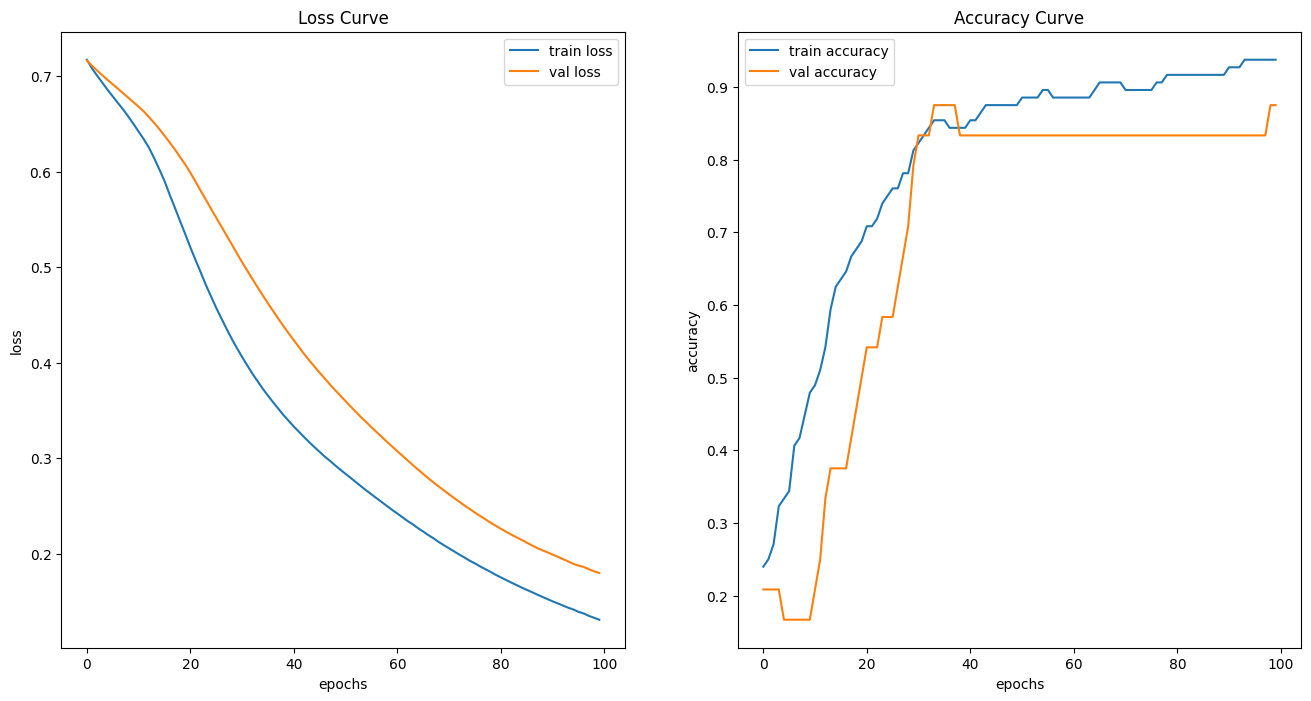

time: 1.26 s (started: 2024-06-28 07:32:34 +00:00)


In [ ]:
plot_history(history)

In [ ]:
y_pred = model.predict(X_var)
y_pred

1/1 [==============================] - 0s 167ms/step


array([[7.6051673e-04, 9.6006256e-01, 3.9176915e-02],
       [1.3351233e-02, 2.5516447e-01, 7.3148429e-01],
       [2.1793488e-02, 5.3088832e-01, 4.4731808e-01],
       [9.9991733e-01, 1.1976473e-06, 8.1458616e-05],
       [9.9985433e-01, 5.8446034e-07, 1.4514853e-04],
       [9.9984765e-01, 3.2453656e-06, 1.4909652e-04],
       [2.7980856e-04, 9.7809082e-01, 2.1629330e-02],
       [7.0153535e-03, 1.0630824e-03, 9.9192148e-01],
       [3.5188075e-02, 8.2538001e-02, 8.8227397e-01],
       [9.9995738e-01, 8.5593945e-07, 4.1768468e-05],
       [9.9981284e-01, 3.7388695e-06, 1.8337498e-04],
       [9.9995977e-01, 1.4525743e-06, 3.8797334e-05],
       [6.1113569e-03, 9.4927110e-02, 8.9896142e-01],
       [4.6206120e-04, 7.6449208e-02, 9.2308879e-01],
       [6.7595770e-03, 7.3675609e-01, 2.5648433e-01],
       [2.3650104e-02, 7.9640001e-03, 9.6838588e-01],
       [5.9419777e-02, 2.9207304e-01, 6.4850712e-01],
       [1.0845331e-03, 9.7436941e-01, 2.4546102e-02],
       [2.0150179e-02, 4.518

time: 275 ms (started: 2024-06-28 07:32:36 +00:00)


In [ ]:
y_pred = np.argmax(y_pred, axis=1) # 시그모이드 사용했을 땐 확률로 나와서 0.5를 기준으로 분류했지만, softmax를 사용하면 세 값중 가장 큰 값의 index를 뽑아내야 함.
y_pred

y_var = np.argmax(y_var, axis=1)
y_var

array([1, 2, 2, 0, 0, 0, 1, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 1, 2, 2, 0, 0,
       0, 0, 0, 2, 0, 2, 0, 1])

time: 13.9 ms (started: 2024-06-28 07:32:36 +00:00)


accuracy: 0.9333333333333333
recall: 0.9487179487179488
precision: 0.8888888888888888
f1: 0.9055555555555556


<Axes: >

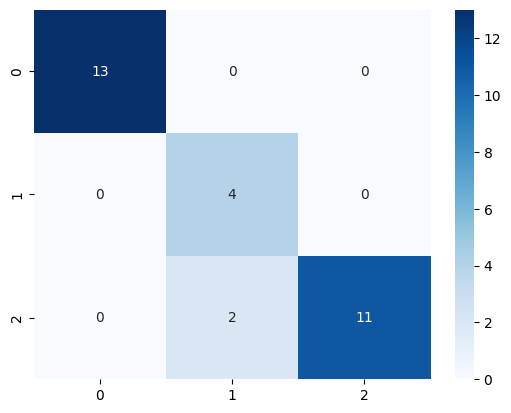

time: 764 ms (started: 2024-06-28 07:34:46 +00:00)


In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

print(f'accuracy: {accuracy_score(y_var, y_pred)}')
print(f'recall: {recall_score(y_var, y_pred, average="macro")}')
print(f'precision: {precision_score(y_var, y_pred, average="macro")}')
print(f'f1: {f1_score(y_var, y_pred, average="macro")}')

sns.heatmap(confusion_matrix(y_var, y_pred), annot=True, cmap='Blues', fmt='d')